# Abrindo Arquivos de Texto
Neste curso de mineração de textos usaremos como material principal de trabalho, os verbetes do Dicionário Histórico e Biográfico do Brasil -- DHBB. Estes verbetes stão disponíveis para Download público.

Neste capítulo vamos aprender a interagir com os verbetes no disco e extrair informações simples a partir dos mesmos.

Vamos começar importando alguma bibliotecas que nos serão úteis nesta tarefa:

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
import glob

In [2]:
print("alô turma!")

alô turma!


Assumindo que os dados do DHBB já foram baixados para um diretório local, podemos começar inspecionando o diretório e listando o seu conteúdo.

In [3]:
# caminho = "F:/dhbb-master/text/*.text"
caminho = "dhbb/text/*.text"
arquivos  = glob.glob(caminho)
len(arquivos)

7687

Temos 7687 verbetes neste diretório. Vamos agora ver como abrir um destes verbetes e inspecionar o seu conteúdo:

In [4]:
arquivos[0]

'dhbb/text/6172.text'

Para abrir um arquivo utilizamos um bloco `with`.

In [5]:
with open(arquivos[0],'r', encoding='utf8') as arquivo_aberto:
    verbete = arquivo_aberto.read()
print(verbete)

---
title: PARTIDO POPULAR DO DISTRITO FEDERAL
natureza: temático
tipo:
 - Organização
subtipo: 
 - Político-administrativa
---

«PARTIDO POPULAR DO DISTRITO FEDERAL»

Partido político do Rio de Janeiro (então Distrito Federal) fundado em
1933. Era presidido por João Câncio da Silva.

Nas eleições para a Assembléia Nacional Constituinte de 1933, apresentou
uma chapa composta por Américo Basílio Silvado, Henrique de Toledo
Dodsworth, Amélio Dias de Morais, Adolfo Bergamini, Jones Gonçalves
Rocha, José Matoso de Sampaio Correia, Antenor Esposel Coutinho, Inácio
Bittencourt, Berta Lutz e Georgina de Araújo Lima.




Uma outra maneira de abrir um arquivo, seria como se segue, mas teríamos que usar uma linha de código a mais, para fechar o arquivo, que podemos economizar, lendo o arquivo dentro de um bloco `with` como fizemos anteriormente.

In [6]:
arquivo_aberto = open(arquivos[0], 'r', encoding='utf8')
verbete = arquivo_aberto.read()
arquivo_aberto.close()

A variável **verbete** que criamos na célula anterior é uma variável do tipo `string`, que é a otipo usado pelo Python para representar um bloco de texto. Podemos manipular o texto dentro de uma `string` de diversas maneiras:

In [7]:
type(verbete)

str

In [8]:
print(verbete.split('---')[1])


title: PARTIDO POPULAR DO DISTRITO FEDERAL
natureza: temático
tipo:
 - Organização
subtipo: 
 - Político-administrativa



Tipos de dados em Python, também conhecidos como  objetos, possuem métodos. O método `split` do tipo `string` segmenta uma string nas posicões em que ocorram uma sequência específica de caracteres, retornando um outro tipo de dado, denominado `lista`.

In [9]:
type(verbete.split('---'))

list

Listas são sequências de objetos de quaisquer tipos que também apresentam seu conjunto de métodos. Para descobrir os métodos de qualquer objeto, basta colocar um ponto após o nome da variável e pressionar a tecla `<tab>`. Listas são delimitadas por colchetes: `[]` (lista vazia). Abaixo vamos dividir o verbete em uma lista de `strings`.

In [10]:
l = verbete.split('---')
l

['',
 '\ntitle: PARTIDO POPULAR DO DISTRITO FEDERAL\nnatureza: temático\ntipo:\n - Organização\nsubtipo: \n - Político-administrativa\n',
 '\n\n«PARTIDO POPULAR DO DISTRITO FEDERAL»\n\nPartido político do Rio de Janeiro (então Distrito Federal) fundado em\n1933. Era presidido por João Câncio da Silva.\n\nNas eleições para a Assembléia Nacional Constituinte de 1933, apresentou\numa chapa composta por Américo Basílio Silvado, Henrique de Toledo\nDodsworth, Amélio Dias de Morais, Adolfo Bergamini, Jones Gonçalves\nRocha, José Matoso de Sampaio Correia, Antenor Esposel Coutinho, Inácio\nBittencourt, Berta Lutz e Georgina de Araújo Lima.\n\n']

Note que nas strings acima existem várias ocorrências da sequencia de caracteres `'\n'`. Esta sequência identifica quebra de linhas. Podemos então utilizá-la para dividir o cabeçalho do verbete em uma lista de linhas:

In [11]:
cabeçalho = verbete.split('---')[1]
cabeçalho.splitlines()

['',
 'title: PARTIDO POPULAR DO DISTRITO FEDERAL',
 'natureza: temático',
 'tipo:',
 ' - Organização',
 'subtipo: ',
 ' - Político-administrativa']

Elementos de uma lista podem ser acessado por sua posição na sequência, por exemplo para acessar a 3ª string da lista:

In [12]:
print(l[2])



«PARTIDO POPULAR DO DISTRITO FEDERAL»

Partido político do Rio de Janeiro (então Distrito Federal) fundado em
1933. Era presidido por João Câncio da Silva.

Nas eleições para a Assembléia Nacional Constituinte de 1933, apresentou
uma chapa composta por Américo Basílio Silvado, Henrique de Toledo
Dodsworth, Amélio Dias de Morais, Adolfo Bergamini, Jones Gonçalves
Rocha, José Matoso de Sampaio Correia, Antenor Esposel Coutinho, Inácio
Bittencourt, Berta Lutz e Georgina de Araújo Lima.




Muitas vezes, as atrings podem vir acompanhadas de um ou mais espaços no ínicio ou no fim. Para removê-los podemos usar o método `strip` como exemplificado abaixo. Caso queiramos remover apenas os espaços no início ou no fim, podemos usar `lstrip` ou `rstrip`, respectivamente.

In [13]:
"   gjsldfkgj    ".strip()

'gjsldfkgj'

Um outro tipo de estrutura de dados fundamental no Python, é chamado um dicionário, e é denotado por um conjunto de pares de (chave: valor). Abaixo vamos construir um dicionário com os campos de um verbete.

In [14]:
campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n') if l and ':' in l}
campos

{'title': 'PARTIDO POPULAR DO DISTRITO FEDERAL',
 'natureza': 'temático',
 'tipo': '',
 'subtipo': ''}

No exemplo acima usamos um laço `for` para percorrer repetidamente o campos do cabeçalho e inseri-los um-a-um no dicionário, em apenas uma linha de código. esta maneira de prencher o dicionário é chamada de *"dict comprehension"*. Para entendermos melhor como funciona um laço for, e exatament a sequencia de operações realizada acima, vamos escrever "por extenso" o código acima.

In [15]:
campos = {}
for linha in cabeçalho.split('\n'):
    if linha and ':' in linha:
        chave, valor = linha.split(':')
        campos[chave.strip()] = valor.strip()

campos

{'title': 'PARTIDO POPULAR DO DISTRITO FEDERAL',
 'natureza': 'temático',
 'tipo': '',
 'subtipo': ''}

## Exercícios

Construa para 5 verbetes, um dicionário com o seguinte conteúdo: `{"nome-do-cargo":"período"}` para todos os cargos de cada verbetado.

In [16]:
def pega_cabeçalho(caminho, natureza):
    with open(caminho, 'r', encoding='utf8') as verb:
        cabeçalho = verb.read().split('---')[1]
    if natureza in cabeçalho:
        return cabeçalho
    else:
        return

respostas = []
for verbete in arquivos[10:18]:
    resposta = {}
    cabeçalho = pega_cabeçalho(verbete, 'biográfico')

    if cabeçalho is None:
        continue

    cargos = cabeçalho.split('cargos:')[1]
    lista_de_cargos = [cargo.strip('- ') for cargo in cargos.splitlines() if cargo.strip('- ') != ""]
    for cargo in lista_de_cargos:
        partes = cargo.split()
        if len(partes) > 1:
            per = partes[-1]
            nome = ' '.join(partes[:-1])
        else:
            nome = partes[0]
            per = "NA"
        resposta[nome] = per
    respostas.append(resposta)
#     print(cargos)
    print(resposta)
print(sum([1 for r in respostas if 'autor:' in r]))

{'gov. GO': '1950-1951'}
{'mov.': 'comunista', 'rev.': '1932', 'dep. fed. SP': '1947-1951'}
{'gov. PE': '1982-1983'}
{'militar': 'NA', 'rev.': '1935'}
{'dep. fed. MG': '1935-1937', 'min. Faz.': '1917-1918', 'sen. MG': '1925-1926', 'pres. MG': '1926-1930', 'rev.': '1930', 'const.': '1934', 'autor:': 'NA', 'Mauro': 'Malin'}
1


Na célula acima contruímos uma variável de tipo *Dicionário*, que é basicamente um conjunto de pares, delimitado por `{}`. Estes pares são chamados pares `chave: valor`, como dissemos anteriormente.


Modifique o código acima para criar outro dicionário com a seguinte estrutura:
```python
{
    "nome": ["nome do verbetado", "nome do verbetado", ...],
    "cargo":[cargo 1, cargo2, ...],
    "início": [1987,1987, ...],
    "fim": [1988, 1991, ...]
}
```

In [17]:
import re
regex = re.compile('([0-9-]{4,5})')
cargo = " - emb. Itália no Brasil 1932-1937"
re.findall(regex,cargo)

['1932-', '1937']

In [18]:
import re
regex = re.compile('([0-9-]{4,5})')
resposta = {"nome": [], "cargo":[], "sexo":[], "inicio":[], "fim":[]}
for verbete in arquivos:
    cabeçalho = pega_cabeçalho(verbete, 'biográfico')
    if cabeçalho is None:
        continue
    cabeçalho = cabeçalho.split('autor:')[0]
    
    linhas = cabeçalho.splitlines()
    
    cargos = cabeçalho.split('cargos:')[1]
    lista_de_cargos = [cargo.strip('- ') for cargo in cargos.splitlines() if cargo.strip('- ') != ""]
    for cargo in lista_de_cargos:
        resposta['nome'].append([linha.split(':')[1].strip() for linha in linhas if linha.startswith('title:')][0])
        try:
            resposta['sexo'].append([linha.split(':')[1].strip() for linha in linhas if linha.startswith('sexo:')][0])
        except IndexError:
            resposta['sexo'].append('NA')
            print("sexo: ")
            print(cabeçalho)
        m = re.findall(regex,cargo)
        if m:
            corte = cargo.index(m[0])
            partes = (cargo[:corte], cargo[corte:])
        else:
            partes = [cargo]
        if len(partes) > 1:
            per = m
            nome = partes[0]
            try:
                resposta['inicio'].append(int(m[0].strip('-')))
            except ValueError: 
                resposta['inicio'].append('NA')
                #print("inicio:", per, per.split('-')[0])
                print(cabeçalho)
            if len(per)>1:
                try:
                    resposta['fim'].append(int(m[1]))
                except ValueError:
                    resposta['fim'].append("NA")
                    print("fim:", per, m[1])
            else:
                resposta['fim'].append("NA")
        else:
            nome = partes[0]
            resposta['inicio'].append("NA")
            resposta['fim'].append("NA")
        resposta['cargo'].append(nome.strip())
        

#     print(cargos)
   # print(resposta)
#print(sum([1 for r in resposta if 'autor:' in r]))

sexo: 

title: SIQUEIRA, Darci
natureza: biográfico
cargos: 
 - militar
 - dir. DASP 1974-1979

sexo: 

title: SIQUEIRA, Darci
natureza: biográfico
cargos: 
 - militar
 - dir. DASP 1974-1979

fim: ['1952', '1955-', '1956'] 1955-
fim: ['1981', '1982-', '1983'] 1982-
sexo: 

title: DUTRA, Eurico Gaspar
natureza: biográfico
cargos: 
 - militar
 - comte. 1ª RM 1935-1936
 - min. Guerra 1936-1945
 - pres. Rep. 1946-1951

sexo: 

title: DUTRA, Eurico Gaspar
natureza: biográfico
cargos: 
 - militar
 - comte. 1ª RM 1935-1936
 - min. Guerra 1936-1945
 - pres. Rep. 1946-1951

sexo: 

title: DUTRA, Eurico Gaspar
natureza: biográfico
cargos: 
 - militar
 - comte. 1ª RM 1935-1936
 - min. Guerra 1936-1945
 - pres. Rep. 1946-1951

sexo: 

title: DUTRA, Eurico Gaspar
natureza: biográfico
cargos: 
 - militar
 - comte. 1ª RM 1935-1936
 - min. Guerra 1936-1945
 - pres. Rep. 1946-1951



In [19]:
print(pega_cabeçalho(arquivos[3], 'biográfico'))


title: SILVA, Luís Gonzaga do Nascimento e
natureza: biográfico
sexo: m
cargos: 
 - pres. BNH 1965-1966
 - min. Trab. 1966-1967
 - min. Prev. Social 1974-1979
 - emb. Bras. França 1979-1985 



## Abrindo um grande número de documentos texto
Como vimos acima existem 7687 verbetes à nossa disposição no disco, mas não podemos abrir todos ao mesmo tempo pois, em primeiro lugar podem não caber na memória, em segundo lugar raramente precisaremos inpecioná-los todos ao mesmo tempo. O mais comum é analisá-los em sequência. Vamos inspecionar os primeiros 10:

In [20]:
for a in arquivos[:10]:
    with open (a, 'r', encoding='utf8') as f:
        verbete = f.readlines()
    print('Verbete: ', a.split('.text')[0].split('/')[-1])
    print(verbete[1])

Verbete:  6172
title: PARTIDO POPULAR DO DISTRITO FEDERAL

Verbete:  4361
title: PRATES, Mílton

Verbete:  5224
title: SUREK, Alberto

Verbete:  5039
title: SILVA, Luís Gonzaga do Nascimento e

Verbete:  6193
title: PARTIDO REFORMADOR TRABALHISTA (PRT)

Verbete:  756
title: BORJA, Célio

Verbete:  5352
title: TORRES, Fontes

Verbete:  1674
title: DAUSTER, Jório

Verbete:  4104
title: PEIXOTO, Augusto Amaral

Verbete:  3974
title: OTERO, Leivas



In [21]:
arquivos[1]

'dhbb/text/4361.text'

Acima utilizamos uma estrutura de repetição, denominada "laço for" para abrir sequencialmente os arquivos. É importante notar que a cada volta do laço, o arquivo texo é atribuído à mesma variável, o que significa que nunca há mais do que apenas um verbete na memória. Desta forma poderíamos potencialmente analisar todos os milhares de verbetes ocupando apenas uma quantidade pequena e constante de memória. Outro detalhe do código acima é que, para facilitar a extração do título do verbete, Fizemos a leitura do arquivo com o método `readlines` que retorna o verbete já divido em uma lista de linhas ao invés de uma `string`.

## Outros recursos do DHBB
O arquivo do DHBB disponível no Github oferece outros recursos textuais para nos auxiliar em nossa pesquisa, como por exemplos dicionários com identificadores de "Entidades" presentes nos verbetes, como pessoas, organizações, eventos, etc.

In [22]:
with  open("dhbb/dic/pessoa-individuo.txt", 'r', encoding='utf8') as f:
    pessoas = f.readlines()
pessoas[:10]

['Aarão Rebelo\n',
 'Aarão Steinbruch\n',
 'Abalcazar Garcia\n',
 'Abdias Do Nascimento\n',
 'Abdon Goncalves Nanhay\n',
 'Abdon Gonçalves\n',
 'Abdon Sena\n',
 'Abdon de Mello\n',
 'Abdur R. Khan\n',
 'Abel Avila dos Santos\n']

In [23]:
with  open("dhbb/dic/pessoa-papel.txt", 'r', encoding='utf8') as f:
    profissão = f.readlines()
profissão[:10]

['Advogado\n',
 'Advogado Geral da União\n',
 'Agente de investimento\n',
 'Agente de segurança judiciária\n',
 'Alfaiate\n',
 'Analista administrativo\n',
 'Analista de comércio exterior\n',
 'Antiquário\n',
 'Arcebispo\n',
 'Armador\n']

In [24]:
with  open("dhbb/dic/evento.txt", 'r', encoding='utf8') as f:
    evento = f.readlines()
evento[:10]

['A Rusga\n',
 'ATENTADO DA TONELEIROS\n',
 'ATENTADO DO RIOCENTRO\n',
 'Aclamação de Amador Bueno\n',
 'Balaiada\n',
 'Batalha da Maria Antônia\n',
 'Batalha da Venda Grande\n',
 'Batalha das Toninhas\n',
 'Batalha de Santa Luzia\n',
 'COMÍCIO DAS REFORMAS\n']

In [25]:
with  open("dhbb/dic/organizacao.txt", 'r', encoding='utf8') as f:
    organização = f.readlines()
organização[:10]

['Abrigo Lar dos Velhos Vicentini\n',
 'Academia Alagoana de Letras\n',
 'Academia Brasileira de Ciências\n',
 'Academia Brasileira de Ciências Econômicas e Administrativas\n',
 'Academia Brasileira de Ciências Sociais e Políticas\n',
 'Academia Brasileira de Direito Empresarial\n',
 'Academia Brasileira de Letras\n',
 'Academia Brasileira de Música\n',
 'Academia Brasiliense de Letras\n',
 'Academia Cultural de Curitiba\n']

In [26]:
with  open("dhbb/dic/formulacao-politica.txt", 'r', encoding='utf8') as f:
    politica = f.readlines()
politica[:10]

['anteprojeto Constitucional\n',
 'anteprojeto da Carta Magna\n',
 'anteprojeto da Comissão Provisória\n',
 'anteprojeto da Comissão Provisória de Estudos Constitucionais\n',
 'anteprojeto da Comissão de Sistematização\n',
 'anteprojeto da Consolidação das Leis do Trabalho\n',
 'anteprojeto da Constituição\n',
 'anteprojeto da Lei Orgânica da Magistratura\n',
 'anteprojeto da Lei de Acidentes no Trabalho\n',
 'anteprojeto da Lei de Direitos Autorais\n']

# Extraindo Informação Estruturada
Agora que sabemos como abrir arquivos de texto e ler o seu conteúdo, podemos experimentar a extração de imformações específicas dos verbetes e organizá-la em uma tabela. Para isso vamos lançar mão de uma biblioteca chamada **Pandas** para organizar em uma estrutura tabular, chamada `DataFrame` os dados que vamos extrair.

In [27]:
import pandas as pd
pd.set_option("display.latex.repr", True)
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Nós vimos acima que os verbetes contém uma seção inicial delimitada pelos caracteres `---` vamos utilizar esta característica do texto para guiar nossa extração de informação. Como você pode perceber, já começamos a reutilizar código que escrevemos anteriormente. Para facilitar o reuso e reduzir a necessidade de escrever múltiplas vezes o mesmo código vamos aprender a organizá-lo melhor. Vamos começar definindo uma função.

In [28]:
def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r', encoding='utf8') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = 'NA' if 'cargos:' not in cabeçalho else cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

A função acima inclui a maior parte do código que escrevemos anteriormente, só que encapsulado em uma função que nos permite executar a extração e tabulação do cabeçalho para o numero de verbetes que desejarmos. Podemos ver abaixo que na verdade é muito rápido processar todos os verbetes.

In [29]:
help(tabula_verbete)

Help on function tabula_verbete in module __main__:

tabula_verbete(n=None)
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular



In [30]:
tab = tabula_verbete()

In [31]:
tab.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,arquivo,title,natureza,sexo,cargos,corpo
0,6172.text,PARTIDO POPULAR DO DISTRITO FEDERAL,temático,NaN,NA,\n\n«PARTIDO POPULAR DO DISTRITO FEDERAL»\n\nP...
1,4361.text,"PRATES, Mílton",biográfico,m,\n - const. 1946\n - dep. fed. MG 1946-1951 \n,\n\n«Luís Mílton Prates» nasceu em Montes Clar...
2,5224.text,"SUREK, Alberto",biográfico,m,\n - const. 1934\n - dep. fed. prof. 1935-193...,\n\n«Alberto Surek» nasceu em Araucária (PR) n...
3,5039.text,"SILVA, Luís Gonzaga do Nascimento e",biográfico,m,\n - pres. BNH 1965-1966\n - min. Trab. 1966-...,\n\n«Luís Gonzaga do Nascimento e Silva» nasce...
4,6193.text,PARTIDO REFORMADOR TRABALHISTA (PRT),temático,NaN,NA,\n\n«PARTIDO REFORMADOR TRABALHISTA (PRT)»\n\n...


Podemos visualizar uma descrição básica da tabela resultante

In [32]:
tab.describe()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,arquivo,title,natureza,sexo,cargos,corpo
count,7687,7687,7687,6722,7687,7687
unique,7687,7596,2,2,6067,7685
top,6172.text,"ARAGÃO, Muniz de",biográfico,m,NA,\n\n«Antônio de Freitas Cavalcanti» nasceu em ...
freq,1,3,6724,6517,963,2


Por exemplo fica fácil ver que no DHBB predominam biografias de personagens do sexo masculino.

In [33]:
print(tab.sexo.value_counts())

m    6517
f     205
Name: sexo, dtype: int64


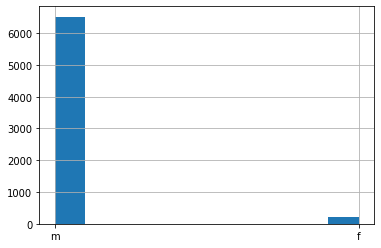

In [34]:
tab.sexo.hist();

Percebemos também que a natureza predominante dos verbetes é biográfica e que só existem duas naturezas, mas qua a outra?

In [35]:
print(tab.natureza.value_counts())

biográfico    6724
temático       963
Name: natureza, dtype: int64


In [36]:
tab2 = pd.DataFrame(resposta)
tab2.inicio = tab2.inicio.replace('NA', pd.np.nan)
tab2.fim = tab2.fim.replace('NA', pd.np.nan)
tab2.head()

/tmp/ipykernel_121647/2806614349.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  tab2.inicio = tab2.inicio.replace('NA', pd.np.nan)
/tmp/ipykernel_121647/2806614349.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  tab2.fim = tab2.fim.replace('NA', pd.np.nan)
/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,nome,cargo,sexo,inicio,fim
0,"PRATES, Mílton",const.,m,1946.0,NaN
1,"PRATES, Mílton",dep. fed. MG,m,1946.0,1951.0
2,"SUREK, Alberto",const.,m,1934.0,NaN
3,"SUREK, Alberto",dep. fed. prof.,m,1935.0,1937.0
4,"SILVA, Luís Gonzaga do Nascimento e",pres. BNH,m,1965.0,1966.0


In [37]:
for c, v in resposta.items():
    print(c, len(v))

nome 14826
cargo 14826
sexo 14826
inicio 14826
fim 14826


In [38]:
tab2.dropna()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,nome,cargo,sexo,inicio,fim
1,"PRATES, Mílton",dep. fed. MG,m,1946.0,1951.0
3,"SUREK, Alberto",dep. fed. prof.,m,1935.0,1937.0
4,"SILVA, Luís Gonzaga do Nascimento e",pres. BNH,m,1965.0,1966.0
5,"SILVA, Luís Gonzaga do Nascimento e",min. Trab.,m,1966.0,1967.0
6,"SILVA, Luís Gonzaga do Nascimento e",min. Prev. Social,m,1974.0,1979.0
...,...,...,...,...,...
14819,"LIMA, Osmir",dep. fed. AC,m,1995.0,1999.0
14820,"VASCONCELOS, Luís",dep. fed. MG,m,1979.0,1983.0
14823,"FONSECA, Olinto",dep. fed. MG,m,1946.0,1955.0
14824,"CAMARGO, Adalberto",dep. fed. SP,m,1967.0,1983.0


In [39]:
tab2[(['dep.' in c for c in tab2.cargo])&(tab2.inicio >1917)&(tab2.inicio<=2015)]

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,nome,cargo,sexo,inicio,fim
1,"PRATES, Mílton",dep. fed. MG,m,1946.0,1951.0
3,"SUREK, Alberto",dep. fed. prof.,m,1935.0,1937.0
8,"BORJA, Célio",dep. fed. GB,m,1971.0,1975.0
9,"BORJA, Célio",dep. fed. RJ,m,1975.0,1983.0
12,"TORRES, Fontes",dep. fed. RJ,m,1964.0,1967.0
...,...,...,...,...,...
14819,"LIMA, Osmir",dep. fed. AC,m,1995.0,1999.0
14820,"VASCONCELOS, Luís",dep. fed. MG,m,1979.0,1983.0
14823,"FONSECA, Olinto",dep. fed. MG,m,1946.0,1955.0
14824,"CAMARGO, Adalberto",dep. fed. SP,m,1967.0,1983.0


In [40]:

tab2[(tab2.cargo.isin(['dep. fed. RJ', 'dep. fed. SP']))&(tab2.inicio==1991)]
#tab2.iloc[14825].cargo

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,nome,cargo,sexo,inicio,fim
130,"PORTUGAL, Paulo",dep. fed. RJ,m,1991.0,1995.0
578,"ABI-RAMIA, Junot",dep. fed. RJ,m,1991.0,1995.0
680,"SILVA, Edevaldo",dep. fed. SP,m,1991.0,1993.0
961,"HADDAD, Alberto",dep. fed. SP,m,1991.0,1995.0
1549,"REIS, Vanda",dep. fed. RJ,f,1991.0,1995.0
...,...,...,...,...,...
13853,"MELÃO NETO, João",dep. fed. SP,m,1991.0,1992.0
14163,"MELO, Euclides de",dep. fed. SP,m,1991.0,1995.0
14552,"FRIAS, Edésio",dep. fed. RJ,m,1991.0,1992.0
14596,"BOLSONARO, Jair",dep. fed. RJ,m,1991.0,NaN


In [41]:
'dep. fed.' in "dep. fed. MT"

True

## Exercícios

1. Construa uma função para buscar apenas verbetes de personagens que tenham ocupado o cargo de deputado federal. Tabule os resultados incluindo o número de mandatos.
1. Construa uma função para buscar o primeiro verbete temático e apresente o seu conteúdo.
1. Encontre todos os verbetes que contenham "Academia Brasileira de Letras". Que porcentagem destes correspondem a membros da dita academia?
1. Construa uma linha do tempo que represente a cobertura histórica do DHBB.

# Exportando para Bancos de Dados
Depois de realizarmos a nossa análise e tabular os resultados, podemos exportar a tabela em vários formatos. Em primeiro lugar, caso queiramos abri nossa trabalho em uma planilha, devemos salvar no formato CSV, ou "comma-separated-values". Este formato pode ser aberto imediatamente em uma planilha.

In [42]:
tab.to_csv("minha_tabela.csv", sep='|')

Acima usamos o caracter "|" como separador para evitar confusões com as virgulas existentes no texto.
## Exportando para um banco de dados relacional
Para exportar para um banco relacional, precisamos de uma biblioteca adicional, o [SQLAlchemy](https://www.sqlalchemy.org/). Estabiblioteca nos permite interagir com a maioria dos banco relacionais. Aqui vamos usar o banco [SQLite](https://www.sqlite.org/index.html).

In [43]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///minha_tabela.sqlite', echo=False)

In [44]:
tab.to_sql('resultados', con=engine, if_exists='replace')

7687

In [45]:
tab2.to_sql("cargos", con=engine, if_exists='replace')

14826

Uma vez inserido no banco relacional, podemos fazer consultas aos dados usando a linguagem SQL. Abaixo obtemos o resultado da consulta em uma lista.

In [46]:
engine.execute("select title from resultados where natureza='temático'").fetchall()[:10]

[('PARTIDO POPULAR DO DISTRITO FEDERAL',),
 ('PARTIDO REFORMADOR TRABALHISTA (PRT)',),
 ('DIÁRIO CARIOCA',),
 ('JUVENTUDE BRASILEIRA',),
 ('PLEBISCITO',),
 ('A MANHÃ',),
 ('PARTIDO SOCIALISTA UNIDO (PSU)',),
 ('RÁDIO MAYRINK VEIGA',),
 ('AÇÃO POPULAR (AP)',),
 ('GRUPOS DOS ONZE',)]

Se quisermos os resultado na forma de um `Dataframe`, podemos usar o **Pandas**.

In [47]:
pd.read_sql_query("select * from resultados where natureza='temático'", con=engine).head()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:343: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


,index,arquivo,title,natureza,sexo,cargos,corpo
0,0,6172.text,PARTIDO POPULAR DO DISTRITO FEDERAL,temático,None,NA,\n\n«PARTIDO POPULAR DO DISTRITO FEDERAL»\n\nP...
1,4,6193.text,PARTIDO REFORMADOR TRABALHISTA (PRT),temático,None,NA,\n\n«PARTIDO REFORMADOR TRABALHISTA (PRT)»\n\n...
2,11,5833.text,DIÁRIO CARIOCA,temático,None,NA,\n\n«DIÁRIO CARIOCA»\n\nJornal carioca diário ...
3,13,5939.text,JUVENTUDE BRASILEIRA,temático,None,NA,\n\n«JUVENTUDE BRASILEIRA»\n\nMovimento cívico...
4,15,6308.text,PLEBISCITO,temático,None,NA,\n\n«PLEBISCITO»\n\nPlebiscito é uma votação p...
